True probabilities: [0.1 0.2 0.3 0.4]
Estimated probabilities: [0.23441081 0.21026555 0.46354775 0.09177589]
True means: [0 1 2 3]
Estimated means: [0.28655318 1.79161828 2.47644579 3.76327255]
Iterations until convergence: 362


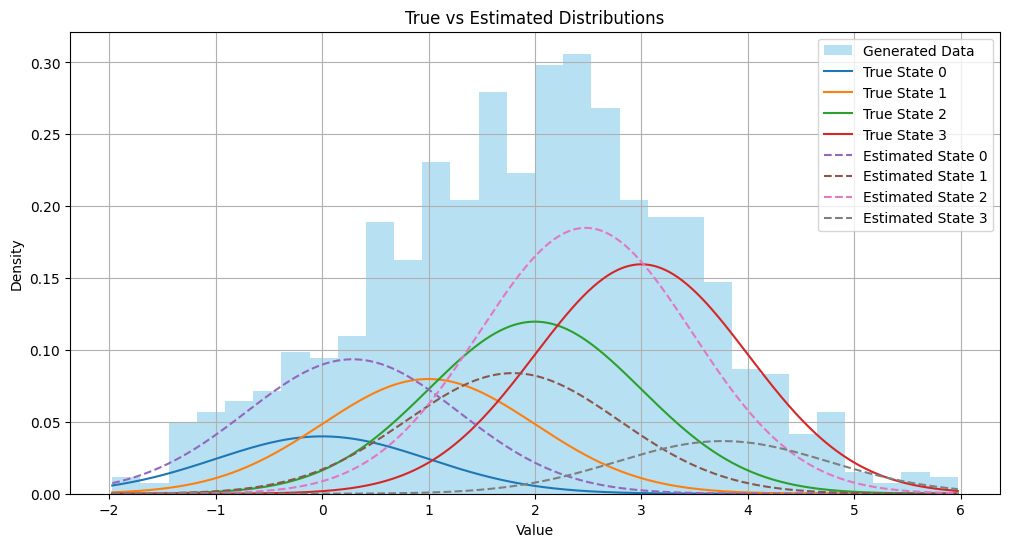

In [2]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

def generate_data(n, probabilities, means, variance=1):
    states = np.random.choice(len(probabilities), size=n, p=probabilities)
    data = np.array([np.random.normal(means[state], np.sqrt(variance)) for state in states])
    return data, states

def em_algorithm(data, num_states, tol=1e-3, max_iter=1000):
    n = len(data)

    # Initialize parameters
    p_k = np.ones(num_states) / num_states
    a_k = np.linspace(min(data), max(data), num_states)
    variance = 1  # Fixed variance

    for iteration in range(max_iter):
        # E-step: Calculate responsibilities
        w_ik = np.zeros((n, num_states))
        for k in range(num_states):
            w_ik[:, k] = p_k[k] * norm.pdf(data, loc=a_k[k], scale=np.sqrt(variance))
        w_ik /= w_ik.sum(axis=1, keepdims=True)

        # M-step: Update parameters
        p_k_new = w_ik.mean(axis=0)
        a_k_new = np.sum(w_ik * data[:, None], axis=0) / w_ik.sum(axis=0)

        # Check convergence
        if np.max(np.abs(p_k_new - p_k)) < tol and np.max(np.abs(a_k_new - a_k)) < tol:
            break

        p_k, a_k = p_k_new, a_k_new

    return p_k, a_k, iteration + 1

# Parameters for the true system
true_probabilities = np.array([1/10, 2/10, 3/10, 4/10])
true_means = np.array([0, 1, 2, 3])

# Generate data
n = 1000
data, states = generate_data(n, true_probabilities, true_means)

# Apply EM algorithm
estimated_probabilities, estimated_means, iterations = em_algorithm(data, num_states=4)

# Output results
print("True probabilities:", true_probabilities)
print("Estimated probabilities:", estimated_probabilities)
print("True means:", true_means)
print("Estimated means:", estimated_means)
print("Iterations until convergence:", iterations)

# Visualization
plt.figure(figsize=(12, 6))

# Plot histogram of the data
plt.hist(data, bins=30, density=True, alpha=0.6, color='skyblue', label='Generated Data')

# Plot true distributions
x = np.linspace(min(data), max(data), 500)
for k, (true_prob, true_mean) in enumerate(zip(true_probabilities, true_means)):
    plt.plot(x, true_prob * norm.pdf(x, loc=true_mean, scale=1), label=f"True State {k}")

# Plot estimated distributions
for k, (est_prob, est_mean) in enumerate(zip(estimated_probabilities, estimated_means)):
    plt.plot(x, est_prob * norm.pdf(x, loc=est_mean, scale=1), linestyle='dashed', label=f"Estimated State {k}")

plt.title("True vs Estimated Distributions")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()